$$\normalsize \textbf{This Supervised Learning Model is to Evaluate the Bank Marketing Campaign}$$


$$\small \textbf{The CopyRight @ Phuong V. Nguyen}$$

This Machine Learning program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$$\underline{\textbf{Main Contents}}$$

# 1. Preparing problem

## 1.1. Loading libraries 

In [2]:
# 1. Algorithms for handling and decribing data
%matplotlib notebook
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from sklern.feature_selector import FeatureSelector

In [ ]:
# 2. Trained Machine Learning for the Classification

In [ ]:
## 2.1. Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
## 2.2. Non-linear Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
## 2.3. Advanced  Algorithms
### 2.3.1. Boosting Methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
### 2.3.2. Bagging Methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
## 2.3.3. Combining several Classification Algorithms
from sklearn.ensemble import VotingClassifier

In [ ]:
# 3. Algorithms for the model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## 1.2. Loading dataset

In [7]:
os.getcwd()

'C:\\Users\\Thilo  Kroeger\\Dropbox\\Machine Learning\\Knowedge ML'

In [10]:
os.chdir('C:/Users/Thilo  Kroeger/Dropbox/Machine Learning/UCI ML/Banking Marketing Campagn/bank')
#'/Users/phuong/Dropbox/Machine Learning/UCI ML/Banking Marketing Campagn/bank')

In [11]:
os.getcwd()

'C:\\Users\\Thilo  Kroeger\\Dropbox\\Machine Learning\\UCI ML\\Banking Marketing Campagn\\bank'

In [12]:
used_data=pd.read_csv('bank-full.csv',sep=';') # sep=';' since the separator is ';' in the csv file

# 2. Understanding and Summarizing data

In [13]:
# Defining some varibale for printing the result
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

## 2.1. Descriptive Statistics

### 2.1.1 Shape of data

In [14]:
print(Bold+ Red+'\n The Size of Datasets \n'.center(80,'*')+End)
print(Bold + Blue+ 'THe Number of Columns:'+ End, len(used_data.columns))
print(Bold+ Blue+'The Number of Row:' +End,len(used_data))
print(Bold + Red +'The End'. center(28,'*')+End)

****************************
 The Size of Datasets 
****************************
THe Number of Columns: 17
The Number of Row: 45211
**********The End***********


In [ ]:
used_data.columns

In [15]:
print(Bold + Blue + '\nThe Type of Data \n'.center(58,'-') +End )
print(used_data.dtypes)
print(Bold + Blue +'The End'.center(20,'-'))

-------------------
The Type of Data 
--------------------
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
------The End-------


### 2.1.2. Peek at the data

In [ ]:
used_data.iloc[:,0:17].head(10) 
#print(used_data.head(20))

### 2.1.3. Understanding The Nominal Categorical Attribute 

In [51]:
print(Bold+ Red+'\n The Nominal Categorical Attribute: \n'.center(140,'*')+End)
print( Blue + Underline+ '1.Age: \n' +End,  np.unique(used_data['age']))
print( Blue + Underline+ '2.Types of Job: \n' +End,  np.unique(used_data['job']))
print( Blue + Underline+ '3.Married Status: \n' +End,  np.unique(used_data['marital']))
print( Blue + Underline+ '4.Education: \n' +End,  np.unique(used_data['education']))
print( Blue + Underline+ '5.Having Default: \n' +End,  np.unique(used_data['default']))
print( Blue + Underline+ '6.Owning House: \n' +End,  np.unique(used_data['housing']))
print( Blue + Underline+ '7.Having Loan: \n' +End,  np.unique(used_data['loan']))
print( Blue + Underline+ '8.Methods of Contact: \n' +End,  np.unique(used_data['contact']))
print( Blue + Underline+ '9.Month: \n' +End,  np.unique(used_data['month']))
print( Blue + Underline+ '10.Previouse Outcome: \n' +End,  np.unique(used_data['poutcome']))
print( Blue + Underline+ '11.Target Values: \n' +End,  np.unique(used_data['y']))
print(Bold + Red +''.center(50,'*'))

***************************************************
 The Nominal Categorical Attribute: 
***************************************************
1.Age: 
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
2.Types of Job: 
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
3.Married Status: 
 ['divorced' 'married' 'single']
4.Education: 
 ['primary' 'secondary' 'tertiary' 'unknown']
5.Having Default: 
 ['no' 'yes']
6.Owning House: 
 ['no' 'yes']
7.Having Loan: 
 ['no' 'yes']
8.Methods of Contact: 
 ['cellular' 'telephone' 'unknown']
9.Month: 
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
10.Previouse Outcome: 
 ['failure' 'other' 'success' 'unknown']
11.Target Values: 
 ['no' 'yes']


### 2.1.4. Tranforming the Nominal Categorical Value into the Binary Dummy Feature

In [16]:
tranformed_data=pd.get_dummies(used_data,columns=['job','marital', 'education', 'default',
                                                 'housing','loan', 'contact','day','month','poutcome','y'], 
                 prefix=['job','marital', 'education', 'default',
                        'housing','loan', 'contact','day','month','poutcome','y'],drop_first=True)

In [17]:
print(Bold + Blue + '1.The Dimension of New Data Frame:'+ End)
print(Bold + Cyan + '(Rows,Columns) \n'+ End,tranformed_data.shape ) 
print(Bold + Blue + '2.The Dimension of Old Data Frame:'+ End)
print(Bold + Cyan + '(Rows,Columns) \n'+ End,used_data.shape ) 

1.The Dimension of New Data Frame:
(Rows,Columns) 
 (45211, 72)
2.The Dimension of Old Data Frame:
(Rows,Columns) 
 (45211, 17)


### 2.1.3. Statisical Summary

In [18]:
tranformed_data.describe()
#print(used_data.describe())

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,0.209197,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,0.406740,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.1.4. Checking features

## 2.2. Data Visualization

### 2.2.1. Univeriate Plots

#### 2.2.1.1. Histograms

<IPython.core.display.Javascript object>


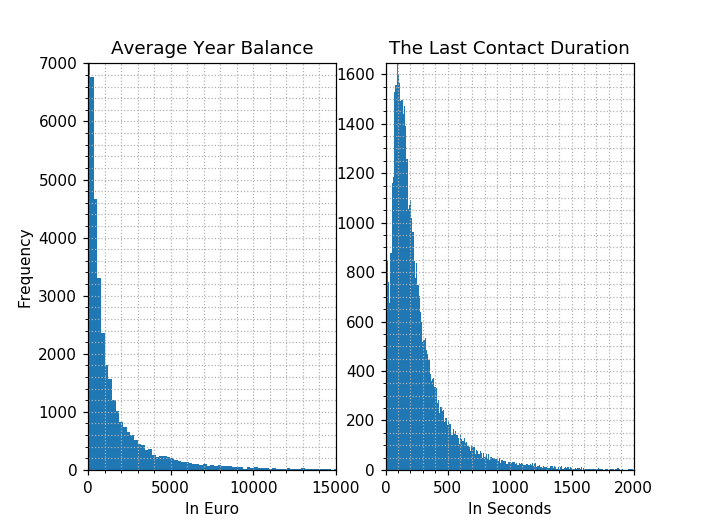

Text(0.5, 0, 'In Seconds')

In [184]:
fig=plt.figure(1)
plt.subplot(121)
plt.hist(tranformed_data['balance'],bins=500,density=False)
#plt.autoscale(enable=True, axis='both',tight=True)
plt.xlim(0, 15000)
plt.ylim(0, 7000)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('Average Year Balance')
plt.xlabel('In Euro',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

plt.subplot(122)
plt.hist(tranformed_data['duration'],bins=500,density=False)
plt.autoscale(enable=True, axis='both',tight=True)
plt.xlim(0, 2000)
#plt.ylim(0, 7000)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('The Last Contact Duration')
plt.xlabel('In Seconds',fontsize=10)



In [ ]:
fig=plt.figure(2)
plt.subplot(121)
plt.hist(tranformed_data['campaign'],bins=500,density=False)
plt.xlim(0, 20)
plt.ylim(0, 17500)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('No. Contact During Campaign')
plt.ylabel('Frequency',fontsize=10)

plt.subplot(122)
plt.hist(tranformed_data['duration'],bins=500,density=False)
plt.autoscale(enable=True, axis='both',tight=True)
plt.xlim(0, 2000)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('No. Contact Before Campaign')


In [ ]:
fig=plt.figure(3)
plt.hist(tranformed_data['pdays'],bins=500)
plt.xlim(0, 400)
plt.ylim(0, 200)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('The Duration of No Contact',fontsize=14)
plt.xlabel('Days',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

#### 2.2.1.2. Desity Plots

<IPython.core.display.Javascript object>


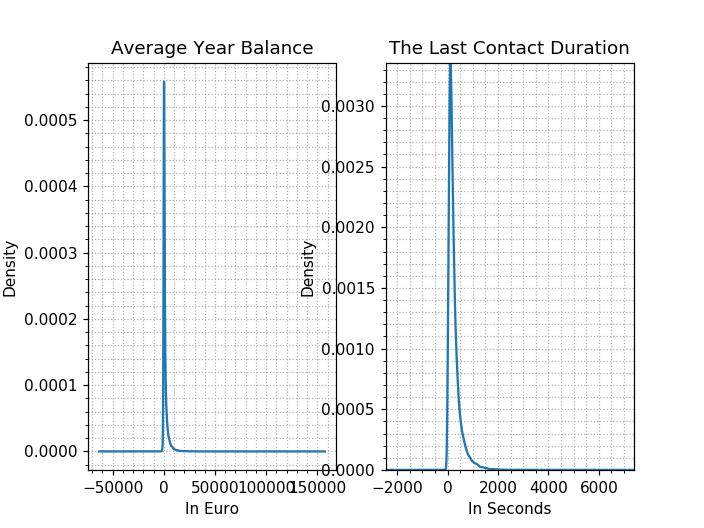

Text(0.5, 0, 'In Seconds')

In [185]:
fig=plt.figure(4)
plt.subplot(121)
tranformed_data['balance'].plot(kind='density')
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('Average Year Balance')
plt.xlabel('In Euro',fontsize=10)

plt.subplot(122)
tranformed_data['duration'].plot(kind='density')
plt.autoscale(enable=True, axis='both',tight=True)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('The Last Contact Duration')
plt.xlabel('In Seconds',fontsize=10)

#### 2.2.1.3. Box and Whishker Plots

<IPython.core.display.Javascript object>


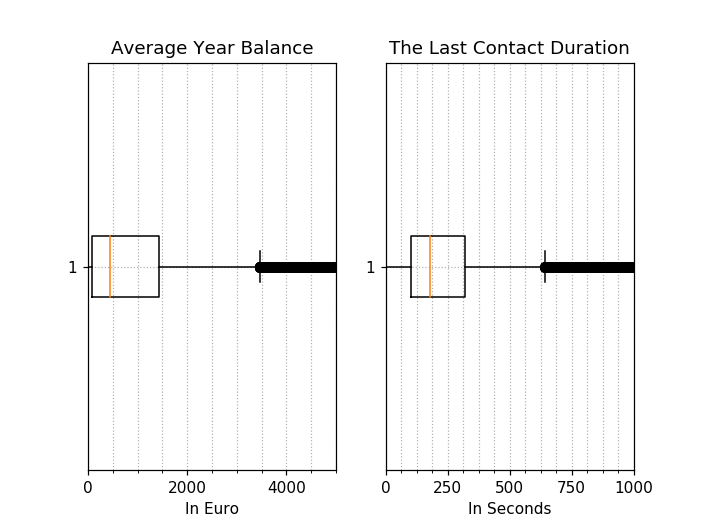

Text(0.5, 0, 'In Seconds')

In [186]:
fig=plt.figure(5)
plt.subplot(121)
plt.boxplot(tranformed_data['balance'],vert=0)
plt.xlim(-1,5000)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('Average Year Balance')
plt.xlabel('In Euro',fontsize=10)

plt.subplot(122)
plt.boxplot(tranformed_data['duration'],vert=0)
plt.xlim(-1,1000)
plt.grid(linestyle= ':',which='both')
plt.minorticks_on()
plt.title('The Last Contact Duration')
plt.xlabel('In Seconds',fontsize=10)

### 2.2.2. Multivariate Plots

In [ ]:

scatter_matrix(used_data)
plt.show()


# 3. Preparing Data

## 3.1. Data Cleaning

## 3.2. Feature Selections

## 3.3. Data Tranforms

In [20]:
tranformed_data.shape

(45211, 72)

# 4. Evaluating Algorithms

## 4.1. Split-out Validation Dataset

In [21]:
y=tranformed_data.loc[:,'y_yes']  #used_data['target']  
X=tranformed_data.iloc[:,0:71] #used_data.drop(['target'], axis=1)

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

## 4.2. Building 11 Competed Classification Supervised Learning Models

In [24]:
# Building Eleven classification Supervised Learning Model with all default setting
models=[]
models.append(('LOR', LogisticRegression(solver='lbfgs')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis())) 
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('ETC', ExtraTreesClassifier(n_estimators=100)))
#models.append(('', ()))

## 4.3. Comparing Algorithms

### 4.3.1. Spot Check Algorithms Using the Scoring Criteria

In [ ]:
results=[]
names=[]
print(Bold + Green+ '\n The Spot Check Result of 11 Competed Models \n'.center(135,'-')+End)
for name, model in models:
    kFold=KFold(n_splits=70, random_state=7)
    cv_results=cross_val_score(model, X_train,y_train,cv=kFold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
print(Bold+ Green +"The End".center(44,'-'))

##### How to hide the running procedure for the cross_val_score algorithm?

### 4.3.2. Spot Check Algorithms Using the Visualisation

<IPython.core.display.Javascript object>


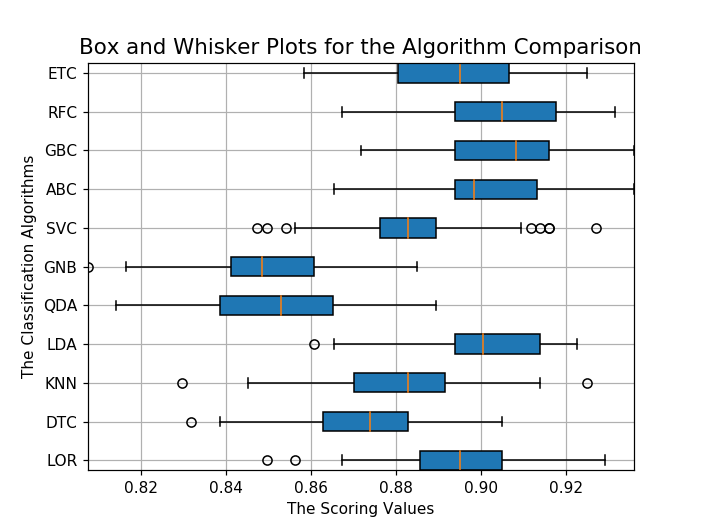

C:\Users\Thilo  Kroeger\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [26]:
fig=plt.figure(4)
plt.boxplot(results,vert=0,patch_artist=True)
ax=fig.add_subplot(111)
ax.set_yticklabels(names)
plt.title('Box and Whisker Plots for the Algorithm Comparison',fontsize=14)
plt.xlabel('The Scoring Values')
plt.ylabel('The Classification Algorithms')
plt.autoscale(enable=True,axis='both',tight=True)
plt.grid()

Among eleven algorithms above, we choose$$\large \textbf{the Gradient Boosting Classifier (GBC) Algorithm}$$

Because the GBC algorithm delivers the highest score of prediction. Other algorithm such as RandomForestClassifier (RFC) also provides high score of the prediction. However, $\text{the Random Forest Classifier (RFC) Algorithm}$ would be another good candidate. Thus, we would use it for the comparison between these two ensemble algorithms.  

We are noting that by using the Voting Algorithms, we can combine several classification algorithms to compete with the GBC one. Accordingly, ETC, ABC, LDA can be combined to form a new algorithm. 

$\underline{\text{Noting that:}}$ It is worth noting that the above comparison is only the spot check. Indeed, all competed models are not at their optimal setting. Thus, it would be better when comparing all competed model at their optimal setting. 

# 5. Improving Accuracy

In this section, we train our supervised model by two classification algorithms: the Gradient Boosting Classifier and Random Forest Classifier Algorithms. The Area Under Curve (AUC) is then used to compare these two algorithms. 

## 5.1. The Gradients Boosting Classcifier (GBC) Algorithms

### 5.1.1. Define the GBC Algorithm

In [41]:
gbc_dev=GradientBoostingClassifier(loss='deviance',learning_rate=0.1, n_estimators=1000)

### 5.1.2. Training the model

In [42]:
train_gbc_dev=gbc_dev.fit(X_train,y_train)

### 5.1.3. Making the Prediction and Model Evaluation

#### 5.1.3.1. Based on the train data

In [43]:
# Making the prediction
y_predic_gbc_dev_train=train_gbc_dev.predict(X_train)
## Pringting the table of the Model Evaluation Based on the test data
print(Bold + Cyan+'The Evaluation Test Result Based On The Train Data'+End)
print(Bold + Blue+'1.The confusion matrix: \n'+Reset, confusion_matrix(y_train,y_predic_gbc_dev_train))
print(Bold + Blue+'2.The accuracy score: \n'+Reset,format(accuracy_score(y_train,y_predic_gbc_dev_train)))
print(Bold + Blue+'3.The table of the classfication report \n'+Reset,classification_report(y_train,y_predic_gbc_dev_train,target_names=['No Subcribe','Subribe']))
print(Bold + Green + 'The End '.center(60,'*')+End)

The Evaluation Test Result Based On The Train Data
1.The confusion matrix: 
 [[27458   485]
 [ 1375  2329]]
2.The accuracy score: 
 0.9412266565551237
3.The table of the classfication report 
               precision    recall  f1-score   support

 No Subcribe       0.95      0.98      0.97     27943
     Subribe       0.83      0.63      0.71      3704

   micro avg       0.94      0.94      0.94     31647
   macro avg       0.89      0.81      0.84     31647
weighted avg       0.94      0.94      0.94     31647

**************************The End **************************


#### 5.1.3.2. Based on the test data

In [45]:
## Making the predition on the test data
y_predic_gbc_dev_test=train_gbc_dev.predict(X_test)
## Pringting the table of the Model Evaluation Based on the test data
print(Bold + Cyan+'The Evaluation Test Result Based On The Train Data'+End)
print(Bold + Blue+'1.The confusion matrix: \n'+Reset, confusion_matrix(y_test,y_predic_gbc_dev_test))
print(Bold + Blue+'2.The accuracy score: \n'+Reset,format(accuracy_score(y_test,y_predic_gbc_dev_test)))
print(Bold + Blue+'3.The table of the classfication report \n'+Reset,classification_report(y_test,y_predic_gbc_dev_test,target_names=['No Subcribe','Subribe']))
print(Bold + Green + 'The End '.center(60,'*')+End)

The Evaluation Test Result Based On The Train Data
1.The confusion matrix: 
 [[11549   430]
 [  850   735]]
2.The accuracy score: 
 0.9056325567679151
3.The table of the classfication report 
               precision    recall  f1-score   support

 No Subcribe       0.93      0.96      0.95     11979
     Subribe       0.63      0.46      0.53      1585

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564

**************************The End **************************


In [57]:
prob_predic_train_gbc_dev_test.shape
y_test.shape

(13564,)

In [58]:
## Computing the predictd probability with the decision_function technique 
prob_predic_train_gbc_dev_test=train_gbc_dev.decision_function(X_test) #predict_proba(X_test)
prob_predic_train_gbc_dev_test

array([-6.065105  , -7.02305642, -3.03103351, ..., -4.6761294 ,
       -2.42216238, -3.32761762])

In [59]:
## Computing the true positive rate (tpr) and the false positve rate (fpr)
fpr_gbc_dev_test,tpr_gbc_dev_test,_=roc_curve(y_test,prob_predic_train_gbc_dev_test)

In [77]:
## Computing the area under the ROC curve
roc_auc_train_gbc_test=auc(fpr_gbc_dev_test,tpr_gbc_dev_test)
print(Bold + Cyan + 'The Area Under the Curve of the Receiver Operation Characteristic'+End)
print(Red+'The computation is based on the Gradient Boosting Classification Algorithm'+End)
print('{:2f}'.format(roc_auc_train_gbc_test)) 

The Area Under the Curve of the Receiver Operation Characteristic
The computation is based on the Gradient Boosting Classification Algorithm
0.928481


## 5.2. The Random Forest Classifier (RFC) Algorithm

### 5.2.1. Define the RFC Algorithm

In [63]:
rfc=RandomForestClassifier(n_estimators=1000)

### 5.2.1. Training the model

In [64]:
train_rfc=rfc.fit(X_train,y_train)

### 5.2.1. Making the Prediction and Model Evaluation

#### 5.2.1.1. Based on the train data

In [68]:
## Making the predition on the train data
y_predic_rfc_train=train_rfc.predict(X_train)
## Final Evaluation Based on the train data
print(Bold + Green+ '\n The LDA-LSQR Model Evaluation Report Based on the Train Data\n'.center(185,'-')+End)
print(Bold + Blue+'1.The confusion matrix: \n'+Reset, confusion_matrix(y_train,y_predic_rfc_train))
print(Bold + Blue+'2.The accuracy score: \n'+Reset,format(accuracy_score(y_train,y_predic_rfc_train)))
print(Bold + Blue+'3.The table of the classfication report \n'+Reset,classification_report(y_train,y_predic_rfc_train,target_names=['No Breast Cancer','Breast Cancer']))
print(Bold + Green + 'The End '.center(60,'*')+End)

-------------------------------------------------------------
 The LDA-LSQR Model Evaluation Report Based on the Train Data
-------------------------------------------------------------
1.The confusion matrix: 
 [[27943     0]
 [    0  3704]]
2.The accuracy score: 
 1.0
3.The table of the classfication report 
                   precision    recall  f1-score   support

No Breast Cancer       1.00      1.00      1.00     27943
   Breast Cancer       1.00      1.00      1.00      3704

       micro avg       1.00      1.00      1.00     31647
       macro avg       1.00      1.00      1.00     31647
    weighted avg       1.00      1.00      1.00     31647

**************************The End **************************


#### 5.2.1.2. Based on the test data

In [69]:
## Making the predition on the train data
y_predic_rfc_test=train_rfc.predict(X_test)
## Final Evaluation Based on the train data
print(Bold + Green+ '\n The LDA-LSQR Model Evaluation Report Based on the Test Data \n'.center(183,'-')+End)
print(Bold + Blue+'1.The confusion matrix: \n'+Reset, confusion_matrix(y_test,y_predic_rfc_test))
print(Bold + Blue+'2.The accuracy score: \n'+Reset,format(accuracy_score(y_test,y_predic_rfc_test)))
print(Bold + Blue+'3.The table of the classfication report \n'+Reset,classification_report(y_test,y_predic_rfc_test,target_names=['No Breast Cancer','Breast Cancer']))
print(Bold + Green + 'The End '.center(60,'*')+End)

------------------------------------------------------------
 The LDA-LSQR Model Evaluation Report Based on the Test Data 
------------------------------------------------------------
1.The confusion matrix: 
 [[11671   308]
 [  998   587]]
2.The accuracy score: 
 0.9037157180772634
3.The table of the classfication report 
                   precision    recall  f1-score   support

No Breast Cancer       0.92      0.97      0.95     11979
   Breast Cancer       0.66      0.37      0.47      1585

       micro avg       0.90      0.90      0.90     13564
       macro avg       0.79      0.67      0.71     13564
    weighted avg       0.89      0.90      0.89     13564

**************************The End **************************


In [79]:
## Computing the score with the decision_function technique 
y_predic_rfc_test_score=train_rfc.predict_proba(X_test)
## Computing the true positive rate (tpr) and the false positve rate (fpr)
fpr_rfc_test,tpr_rfc_test,_=roc_curve(y_test,y_predic_rfc_test_score[:,1])
## Computing the area under the ROC curve
roc_auc_rfc_test=auc(fpr_rfc_test,tpr_rfc_test)
print(Bold + Cyan + 'The Area Under the Curve of the Receiver Operation Characteristic'+End)
print(Red+'The computation is based on the Random Forest Classification Algorithm'+End)
print('{:2f}'.format(roc_auc_rfc_test)) 

The Area Under the Curve of the Receiver Operation Characteristic
The computation is based on the Random Forest Classification Algorithm
0.927838


## 5.4. Comparing the GBC vs RFC Algorithms by the AUC-ROC Curves

<IPython.core.display.Javascript object>


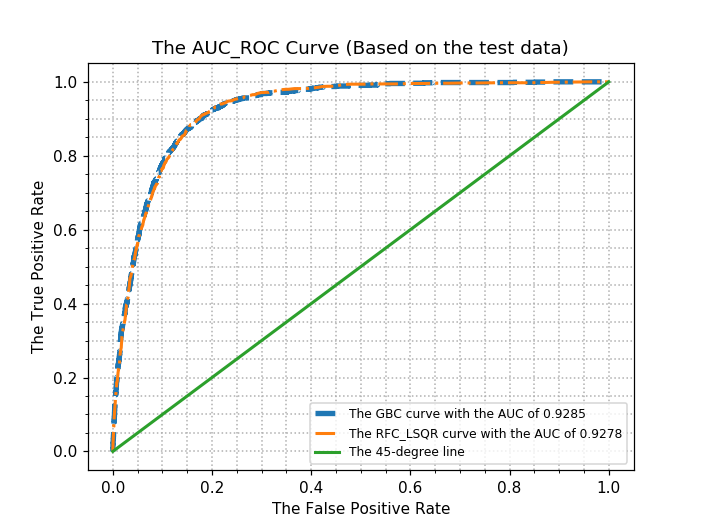

In [74]:
## Ploting the figure
%matplotlib notebook
#plt.figure(figsize=(8,5))
plt.plot(fpr_gbc_dev_test,tpr_gbc_dev_test,lw=3.5,linestyle='--',
         label='The GBC curve with the AUC of {:.4f}'.format(roc_auc_train_gbc_test))
plt.plot(fpr_rfc_test,tpr_rfc_test,lw=2,linestyle='-.',
         label='The RFC_LSQR curve with the AUC of {:.4f}'.format(roc_auc_rfc_test))
plt.plot([0,1],[0,1],lw=2,linestyle='-',
        label='The 45-degree line')
plt.legend(loc='lower right', fontsize=8)
plt.title('The AUC_ROC Curve (Based on the test data)',fontsize=12)
plt.xlabel('The False Positive Rate',fontsize=10)
plt.ylabel('The True Positive Rate',fontsize=10)
plt.grid(b=None,linestyle=':',which='both',linewidth=1) #'major', 'minor', 'both'
plt.minorticks_on()


$$\textbf{Conclusion}$$

The AUC-ROC curve shows that both Gradient Boosting and Random Forest Classifier Algorithms $equally$ deliver the predicted score, with slight favor of $\underline{\text{the Gradient Boosting Algorithm}}$.

# 6. Finalizing Model

In [145]:
model=GradientBoostingClassifier(loss='deviance',learning_rate=0.1, n_estimators=1000)
model.fit(X_train,y_train)
y_predic_gbc_test=model.predict(X_test)
print(Bold + Green+ '\n The GBC Model Evaluation Report Based On The Test Data  \n'.center(183,'-')+End)
print(Bold + Blue+'1.The confusion matrix: \n'+Reset, confusion_matrix(y_test,y_predic_gbc_test))
print(Bold + Blue+'2.The accuracy score: \n'+Reset,format(accuracy_score(y_test,y_predic_gbc_test)))
print(Bold + Blue+'3.The table of the classfication report \n'+Reset,classification_report(y_test,y_predic_gbc_test,target_names=['No Subribe','Subribe']))
print(Bold + Green + 'The End '.center(60,'*')+End)

--------------------------------------------------------------
 The GBC Model Evaluation Report Based On The Test Data  
--------------------------------------------------------------
1.The confusion matrix: 
 [[11548   431]
 [  850   735]]
2.The accuracy score: 
 0.90555883220289
3.The table of the classfication report 
               precision    recall  f1-score   support

  No Subribe       0.93      0.96      0.95     11979
     Subribe       0.63      0.46      0.53      1585

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564

**************************The End **************************


# 7. Sentitive Analysis

##### This section is to find which the most relevant features influence the success of the strategy of direct bank marketing 


In [147]:
modelsen=gbc_dev.fit(X,y)

In [148]:
print(modelsen.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelsen.feature_importances_, X.columns)
feat_importances

[4.96214941e-02 2.82348932e-02 4.33180480e-01 8.39760116e-03
 5.32343703e-02 7.78027104e-03 8.42679080e-04 1.55061724e-03
 4.24871004e-04 1.98293350e-03 5.26155070e-04 2.49226746e-04
 2.28312063e-04 2.42868988e-03 1.10329678e-03 7.62736468e-04
 2.98337387e-04 4.20378675e-03 1.23885073e-03 4.55113549e-04
 2.37722722e-03 8.11772597e-04 3.70266176e-04 3.09016337e-02
 1.90984271e-03 2.12368230e-03 3.79960623e-02 2.35504343e-03
 3.80949413e-03 1.66632811e-03 1.11151567e-03 1.36150062e-03
 1.22958031e-03 5.77670269e-04 6.50389303e-04 2.39291560e-03
 3.63695459e-03 3.50158696e-03 1.30221345e-03 3.04998503e-03
 9.72557914e-04 1.44216240e-03 1.47473288e-03 6.43957062e-04
 1.72674479e-03 3.42204653e-04 1.21003197e-03 1.45232218e-03
 1.02352031e-03 5.25082020e-04 2.33007203e-03 7.96539406e-04
 2.10147711e-03 2.61001083e-04 1.56889266e-03 3.28985431e-03
 7.00342379e-04 3.32847918e-03 5.20029938e-03 1.58788984e-02
 3.16486559e-03 5.13511193e-03 2.13862895e-02 2.91712609e-02
 5.33058733e-03 5.461147

age                    0.049621
balance                0.028235
duration               0.433180
campaign               0.008398
pdays                  0.053234
previous               0.007780
job_blue-collar        0.000843
job_entrepreneur       0.001551
job_housemaid          0.000425
job_management         0.001983
job_retired            0.000526
job_self-employed      0.000249
job_services           0.000228
job_student            0.002429
job_technician         0.001103
job_unemployed         0.000763
job_unknown            0.000298
marital_married        0.004204
marital_single         0.001239
education_secondary    0.000455
education_tertiary     0.002377
education_unknown      0.000812
default_yes            0.000370
housing_yes            0.030902
loan_yes               0.001910
contact_telephone      0.002124
contact_unknown        0.037996
day_2                  0.002355
day_3                  0.003809
day_4                  0.001666
                         ...   
day_16  

<IPython.core.display.Javascript object>


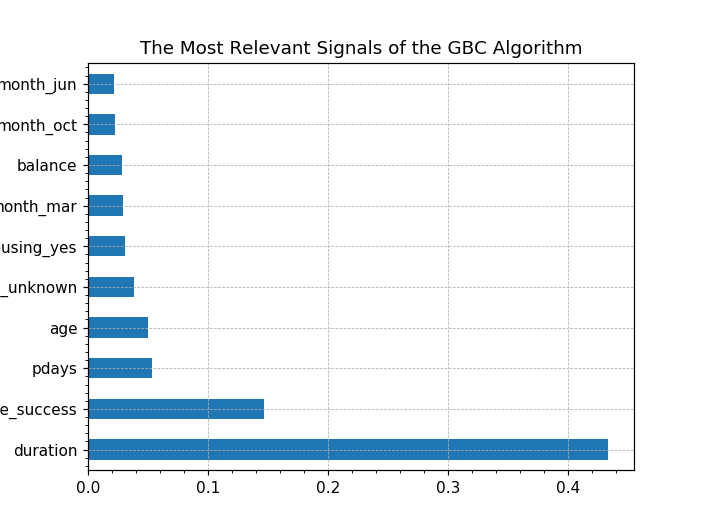

In [182]:
%matplotlib notebook
plt.figure(5)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('The Most Relevant Signals of the GBC Algorithm')
plt.grid(b=None,linestyle='--',which='major',linewidth=0.5) #'major', 'minor', 'both'
plt.minorticks_on()

In [3]:
#plt.figure(7)
sns.lmplot(x='duration',y='campaign',hue='y_yes',
           data=tranformed_data,fit_reg=False,markers=['o','x'])
plt.xlabel('The Call Duration (In Seconds)',fontsize=10)
plt.ylabel('The Number of Call',fontsize=10)
plt.axis([0,2000,1,60])
plt.axhline(y=5,linewidth=2,color='r',linestyle='--')
#plt.axhline(x=1250,linewidth=3,color='k',linestyle='-')

NameError: name 'tranformed_data' is not defined

In [167]:
height=feat_importances[68:71]
height

poutcome_other      0.001863
poutcome_success    0.146983
poutcome_unknown    0.000567
dtype: float64

<IPython.core.display.Javascript object>


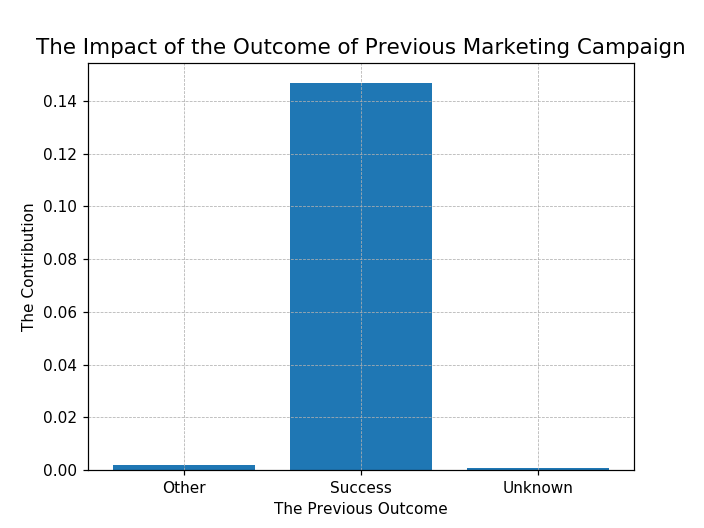

In [183]:
%matplotlib notebook
x=np.arange(3)
plt.figure(6)
plt.bar(x, height=feat_importances[68:71])
plt.xticks(x, ('Other', 'Success', 'Unknown'))
plt.title('The Impact of the Outcome of Previous Marketing Campaign',fontsize=14)
plt.ylabel('The Contribution',fontsize=10)
plt.xlabel('The Previous Outcome',fontsize=10)
plt.grid(b=None,linestyle='--',which='major',linewidth=0.5) #'major', 'minor', 'both'